# Evidence of Discrimination?

The Department of Developmental Services (DDS) in California is responsible for allocating funds to support over 250,000 developmentally-disabled residents. The data set `https://dlsun.github.io/pods/data/ca_dds_expenditures.csv` contains data about 1,000 of these residents. The data comes from a discrimination lawsuit which alleged that California's Department of Developmental Services (DDS) privileged white (non-Hispanic) residents over Hispanic residents in allocating funds. We will focus on comparing the allocation of funds (i.e., expenditures) for these two ethnicities only, although there are other ethnicities in this data set.

There are 6 variables in this data set:

- Id:  5-digit, unique identification code for each consumer (similar to a social security number and used for identification purposes)  
- Age Cohort:  Binned age variable represented as six age cohorts (0-5, 6-12, 13-17, 18-21, 22-50, and 51+)
- Age:  Unbinned age variable
- Gender:  Male or Female
- Expenditures:  Dollar amount of annual expenditures spent on each consumer
- Ethnicity:  Eight ethnic groups (American Indian, Asian, Black, Hispanic, Multi-race, Native Hawaiian, Other, and White non-Hispanic)

In [8]:
import pandas as pd
import numpy as np

In [9]:
df_dds = df_dds = pd.read_csv("https://dlsun.github.io/pods/data/ca_dds_expenditures.csv")
df_dds

,Id,Age Cohort,Age,Gender,Expenditures,Ethnicity
0,10210,13 to 17,17,Female,2113,White not Hispanic
1,10409,22 to 50,37,Male,41924,White not Hispanic
2,10486,0 to 5,3,Male,1454,Hispanic
3,10538,18 to 21,19,Female,6400,Hispanic
4,10568,13 to 17,13,Male,4412,White not Hispanic
...,...,...,...,...,...,...
995,99622,51+,86,Female,57055,White not Hispanic
996,99715,18 to 21,20,Male,7494,Hispanic
997,99718,13 to 17,17,Female,3673,Multi Race
998,99791,6 to 12,10,Male,3638,Hispanic


# Question 1

Read in the data set. Make a graphic that compares the _average_ expenditures by the DDS on Hispanic residents and white (non-Hispanic) residents. Comment on what you see.

Ethnicity
Hispanic              11065.569149
White not Hispanic    24697.548628
Name: Expenditures, dtype: float64

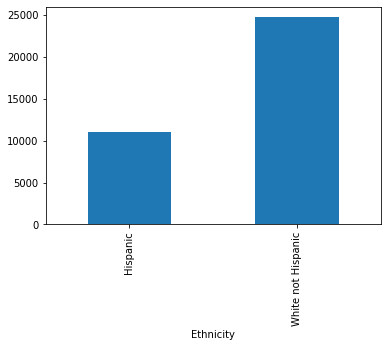

In [10]:
df_white_hispanic = df_dds[(df_dds["Ethnicity"] == "White not Hispanic") | (df_dds["Ethnicity"] == "Hispanic")]
df_white_hispanic.groupby("Ethnicity")["Expenditures"].mean().plot.bar()
df_white_hispanic.groupby("Ethnicity")["Expenditures"].mean()

**Based on the bar plots of expenditures comparing white not hispanic and hispanic individuals, there appears to be a clear difference, where white not hispanic people have much higher mean expenditures.**

# Question 2

Now, calculate the average expenditures by ethnicity and age cohort. Make a graphic that compares the average expenditure on Hispanic residents and white (non-Hispanic) residents, _within each age cohort_. 

Comment on what you see. How do these results appear to contradict the results you obtained in Question 1?

Age Cohort  Ethnicity         
0 to 5      Hispanic               1393.204545
            White not Hispanic     1366.900000
13 to 17    Hispanic               3955.281553
            White not Hispanic     3904.358209
18 to 21    Hispanic               9959.846154
            White not Hispanic    10133.057971
22 to 50    Hispanic              40924.116279
            White not Hispanic    40187.624060
51+         Hispanic              55585.000000
            White not Hispanic    52670.424242
6 to 12     Hispanic               2312.186813
            White not Hispanic     2052.260870
Name: Expenditures, dtype: float64

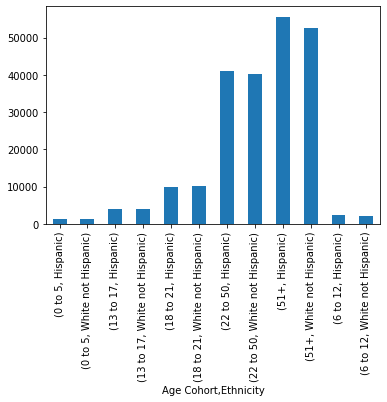

In [11]:
df_white_hispanic.groupby(["Age Cohort", "Ethnicity"])["Expenditures"].mean().plot.bar()
df_white_hispanic.groupby(["Age Cohort", "Ethnicity"])["Expenditures"].mean()

**This is very interesting because when split into age cohorts, Hispanic individuals actually have slightly higher expenditures in every group except for those aged 18 to 21. This directly contradicts the results from the first part, where White individuals had much higher average expenditures.**

# Question 3

Can you explain the discrepancy between the two analyses you conducted above (i.e., Questions 1 and 2)? Try to tell a complete story that interweaves tables, graphics, and explanation.

_Hint:_ You might want to consider looking at:

- the distributions of ages of Hispanics and whites
- the average expenditure as a function of age

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


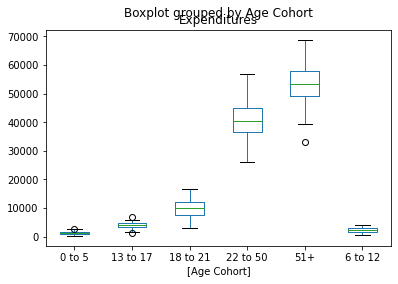

In [12]:
df_white_hispanic.boxplot(by = (["Age Cohort"]), column =["Expenditures"], grid = False)

Ethnicity
Hispanic              AxesSubplot(0.125,0.125;0.775x0.755)
White not Hispanic    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

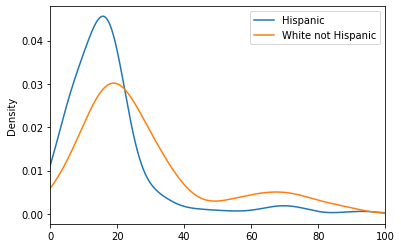

In [13]:
df_white_hispanic.groupby(['Ethnicity'])['Age'].plot.density(legend=True, xlim=(0, 100))

**Firstly, it is clear from the boxplot of expenditures by age cohort that older individuals have much higher expenditures than younger ones. With this information in mind, a higher proportion of Hispanic individuals are younger compared to White individuals, who have a higher proportion of their population in older categories.**

---



**Therefore, it makes sense that White individuals have higher mean expenditures, since a higher proportion with disability expenditures are above 22. Hispanic individuals can still have similar averages within each age cohort, but a lower overall average because a higher proporiton are younger, where the expenditures are much lower.**

## Submission Instructions

- Copy this notebook to your own Drive, if you have not already.
- Restart this notebook and run the cells from beginning to end. 
  - Go to Runtime > Restart and Run All.
- Rename this notebook by clicking on "DATA 301 Lab 2B - YOUR NAME HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you (and your partners, for Phase 2).
- Get the link to your notebook:
  - Click on "Share" at the top-right. 
  - Change the settings to "Anyone with the link can view". 
  - Copy the sharing link into Canvas.